# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [18]:
import pandas as pd
from IPython.display import display

tabela = pd.read_csv("advertising.csv")

display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

OBS: Correlação (corr) é a relação de dependência entre duas variáveis e pode variar entre 0 (nenhuma dependência) e 1 (totalmente dependente)

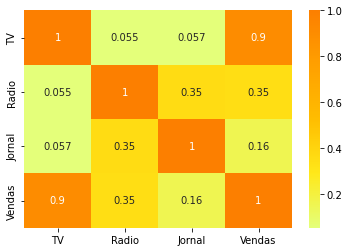

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(tabela.corr(), annot=True, cmap="Wistia")   # ".heeatmap" é o modelo de gráfico escolhido
                                                        # ".corr()" manda fazer a CORRELAÇÃO
                                                        # "annot=True" faz os números serem exibidos dentro dos quadrados do gráfico
                                                        # "cmap="Wistia"" é a escala de cores a ser utilizada no gráfico 
# Outros tipos de plotagem com seaborn -->> https://seaborn.pydata.org/tutorial.html
# Outras escalas de cores -->> https://seaborn.pydata.org/tutorial/color_palettes.html

plt.show() # exibe plotagem

# outra forma de ver a mesma análise (visualização um pouco mais chata)
# sns.pairplot(tabela)
# plt.show()


#### CONCLUSAO: Correlações TV > Rádio > Jornal. 
#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Necessário fazer separação em dados de treino e dados de teste

In [20]:
from sklearn.model_selection import train_test_split

# Separação em x e y, onde:
# y = o que queremos prever; e x = todo o resto
y = tabela["Vendas"] 
x = tabela[["TV", "Radio", "Jornal"]] # x = tabela.drop("Vendas", axis=1)

# ATENÇÃO: x_treino, x_teste, y_treino e y_test devem ser passados necessariamente nessa ordem, pois é a ordem que a função retorna 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)    # x e y são as partes da tabela divididas acima
                                                                                # "test_size=0.3" é a divisão percentual de casos para teste, se não for passada ele assume 0.2 como padrão.

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

OBS: Esses são apenas dois, existem muitos outros (pesquisar)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Cria os modelos de inteligencia artificial
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treina as inteligencias 
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [22]:
from sklearn import metrics

# Cria as previsões
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# Exbibe resultado dos modelos para comparação
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao)) 

0.9008692754383795
0.9598362061929819


#### Visualização Gráfica das Previsões

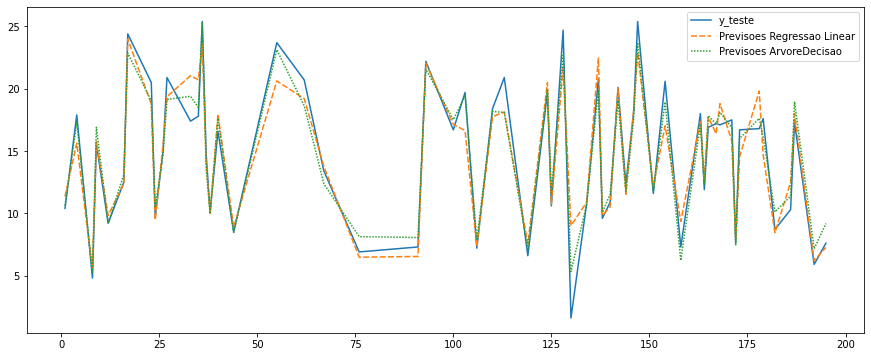

In [23]:
tabela_auxiliar = pd.DataFrame() # cria uma tabela VAZIA
tabela_auxiliar["y_teste"] = y_teste # cria uma coluna com os valores reais de Y na tabela vazia
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear # cria uma coluna com as previsões do modelo regressão linear
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao # cria uma coluna com as previsões do modelo arvore de decisão

plt.figure(figsize=(15,6)) # ajusta tamanho do gráfico
sns.lineplot(data=tabela_auxiliar) # escolhe o modelo do gráfico
plt.show() # exibe

#### Como fazer uma nova previsão?

In [24]:
nova_tabela = pd.read_csv("novos.csv") # importar a nova_tabela com o pandas (deve possuir apenas os dados de TV, Radio e Jornal)
display(nova_tabela) # exibe a tabela recém importada
previsao = modelo_arvoredecisao.predict(nova_tabela) # utilização do modelo que se saiu melhor
print(previsao) # resultados

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 8.153  9.487 20.235]


##### Importância de cada variável para as vendas



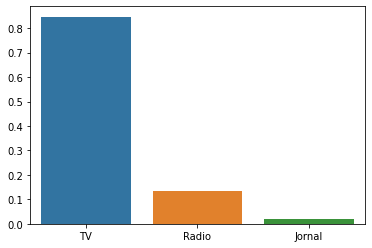

In [25]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()